NAND Dataset:
Inputs: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Outputs: [1 1 1 0]
XOR Dataset:
Inputs: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Outputs: [0 1 1 0]
NAND Perceptron Accuracy: 100.0%
XOR Perceptron Accuracy: 50.0%


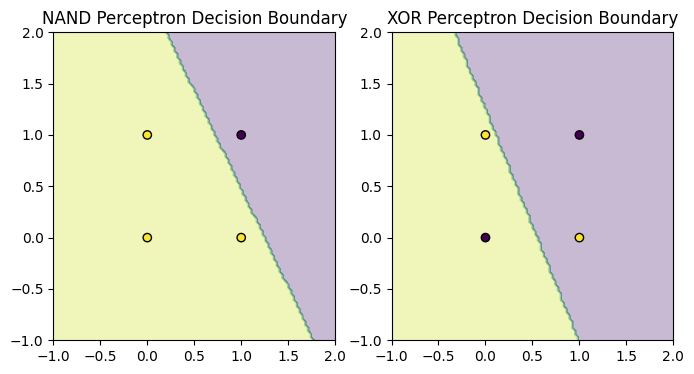

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def activation(self, x):
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        x = np.insert(x, 0, 1)  # Add bias term
        return self.activation(np.dot(self.weights, x))
    
    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                x_i = np.insert(X[i], 0, 1)  # Add bias term
                y_pred = self.activation(np.dot(self.weights, x_i))
                self.weights += self.learning_rate * (y[i] - y_pred) * x_i
    
    def evaluate(self, X, y):
        correct = sum(self.predict(x) == y[i] for i, x in enumerate(X))
        accuracy = correct / len(y) * 100
        return accuracy

# NAND Gate Training Data
X_NAND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_NAND = np.array([1, 1, 1, 0])
print("NAND Dataset:")
print("Inputs:", X_NAND)
print("Outputs:", y_NAND)

# XOR Gate Training Data
X_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_XOR = np.array([0, 1, 1, 0])
print("XOR Dataset:")
print("Inputs:", X_XOR)
print("Outputs:", y_XOR)

# Train and Evaluate Perceptron for NAND
perceptron_nand = Perceptron(input_size=2)
perceptron_nand.train(X_NAND, y_NAND)
nand_accuracy = perceptron_nand.evaluate(X_NAND, y_NAND)
print(f"NAND Perceptron Accuracy: {nand_accuracy}%")

# Train and Evaluate Perceptron for XOR
perceptron_xor = Perceptron(input_size=2)
perceptron_xor.train(X_XOR, y_XOR)
xor_accuracy = perceptron_xor.evaluate(X_XOR, y_XOR)
print(f"XOR Perceptron Accuracy: {xor_accuracy}%")

# Plot decision boundary for NAND
plt.figure(figsize=(8, 4))
def plot_decision_boundary(X, y, perceptron, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.array([perceptron.predict(np.array([xx_val, yy_val])) for xx_val, yy_val in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)

plt.subplot(1, 2, 1)
plot_decision_boundary(X_NAND, y_NAND, perceptron_nand, "NAND Perceptron Decision Boundary")

plt.subplot(1, 2, 2)
plot_decision_boundary(X_XOR, y_XOR, perceptron_xor, "XOR Perceptron Decision Boundary")

plt.show()
